<a href="https://colab.research.google.com/github/drstannwoji2019/SCM_Forecasting/blob/main/ARIMA_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [2]:
# Generate synthetic data
np.random.seed(0)
n = 100
x = np.linspace(0, 4 * np.pi, n)
noise = np.random.normal(0, 0.5, n)
data = 10 * np.sin(x) + noise

In [4]:
# Create a pandas DataFrame with date index
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
data_df = pd.DataFrame(data, index=dates, columns=['demand'])
data_df

,demand
2020-01-01,0.882026
2020-01-02,1.466003
2020-01-03,3.000849
2020-01-04,4.837071
2020-01-05,5.795746
...,...
2020-04-05,-4.508681
2020-04-06,-3.711375
2020-04-07,-1.618545
2020-04-08,-1.202468


In [5]:
# Differencing to make the time series stationary (if needed)
data_diff = data_df.diff().dropna()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


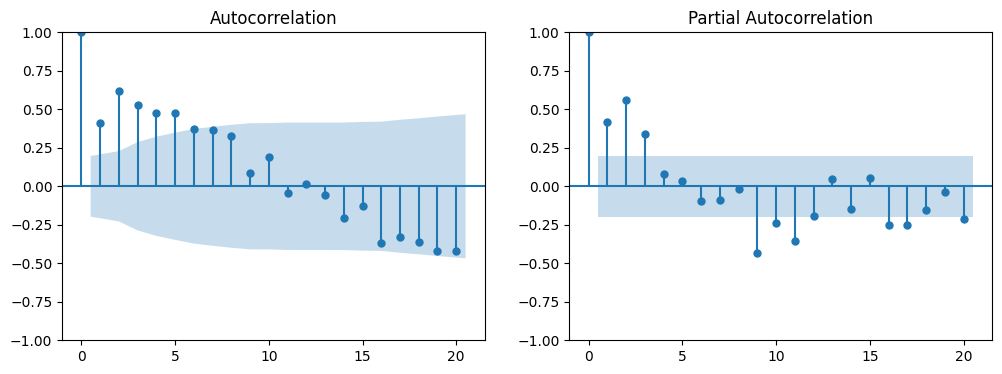

In [6]:
# Plot ACF and PACF to find optimal values for p and q
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data_diff, lags=20, ax=ax1)
plot_pacf(data_diff, lags=20, ax=ax2)
plt.show()

In [7]:
# Define the ARIMA model with optimal p, d, and q values
# Based on the ACF and PACF plots, we'll start with p=1, d=1, and q=1
model = ARIMA(data_df, order=(1, 1, 1))

In [8]:
# Fit the model
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [9]:
# Forecast future demand
# We'll forecast demand for the next 10 days
num_steps = 10
forecast = model_fit.forecast(steps=num_steps)

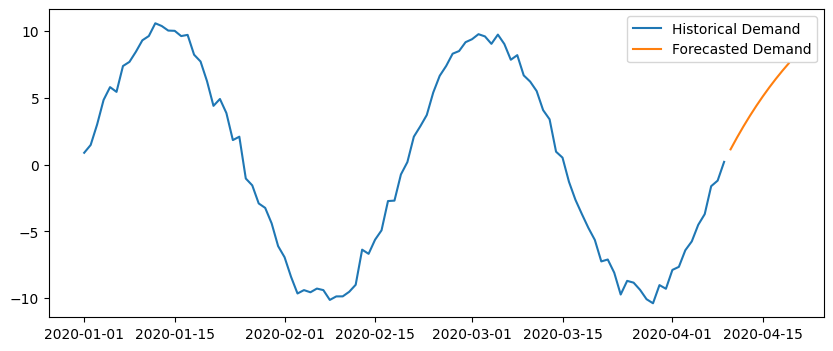

In [10]:
# Plot the forecast
plt.figure(figsize=(10, 4))
plt.plot(data_df, label='Historical Demand')
plt.plot(forecast, label='Forecasted Demand')
plt.legend()
plt.show()